# Surprise Housing
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

This project has been divided in the follow parts:
* Data preparation
* Data cleaning
* EDA
* Modeling

## Know the data

In [1]:
# importing neccary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
pd.options.display.max_columns = None

In [2]:
#Reading data
main_df = pd.read_csv('train.csv')

In [3]:
main_df.head() #For a glimpse of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
main_df.shape

(1460, 81)

So we have 1460 records and 81 attributes

In [5]:
main_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We cans see there are are many null objects in the data set provided.

In [7]:
(main_df.isnull().sum()/len(main_df)*100).sort_values(ascending=False)[:10]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

Since there are lots of missing data for PoolQC, MiscFeature, Alley and Fence. We can safely remove these columns or we can impute the NA values with some appropriate values.

In [8]:
df = main_df.copy()

In [9]:
#Let's impute data
#For PoolQC, NA simple means None. So let's impute that way
df["PoolQC"] = df["PoolQC"].fillna("None")

In [10]:
#Similarly, for MiscFeature, Alley, Fence, FireplaceQu
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")

In [11]:
df["GarageType"] = df["GarageType"].fillna("None")
df["GarageFinish"] = df["GarageFinish"].fillna("None")
df["GarageQual"] = df["GarageQual"].fillna("None")
df["GarageCond"] = df["GarageCond"].fillna("None")

In [12]:
#For some of the numerical attributes like GarageArea and GarageCars, we can replace nulls with 0
df["GarageArea"] = df["GarageArea"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

In [13]:
#LotFrontage, we can impute median LotFrontage of all Neighbourhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [14]:
#GarageYrBlt can be imputed by meadia
#df["GarageYrBlt"]=df["GarageYrBlt"].astype(str)
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])

In [15]:
#df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [16]:
#Let's see how much missing values are still left
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)[:10]

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
ExterQual       0.000000
RoofMatl        0.000000
dtype: float64

In [17]:
#Again for BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1 and BsmtCond can be imputed with None
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")
df["BsmtExposure"] = df["BsmtExposure"].fillna("None")
df["BsmtQual"] = df["BsmtQual"].fillna("None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtCond"] = df["BsmtCond"].fillna("None")

In [18]:
# For MasVnrType and MasVnrArea, we can impute with None and 0 repectively
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [19]:
# For Electrical column let's impute it with the largest occured value, i.e. Mode.
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [20]:
#We can also make some new columns which will give more information about the data set. Such as Total Area, Bathroom and Year Average

df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] +df['GarageArea']
df['Bathrooms'] = df['FullBath'] + df['HalfBath']*0.5 
df['Year average']= (df['YearRemodAdd']+df['YearBuilt'])/2

In [21]:
df.shape

(1460, 84)

Let's have a look on the heat map that shows the correlation between the columns.

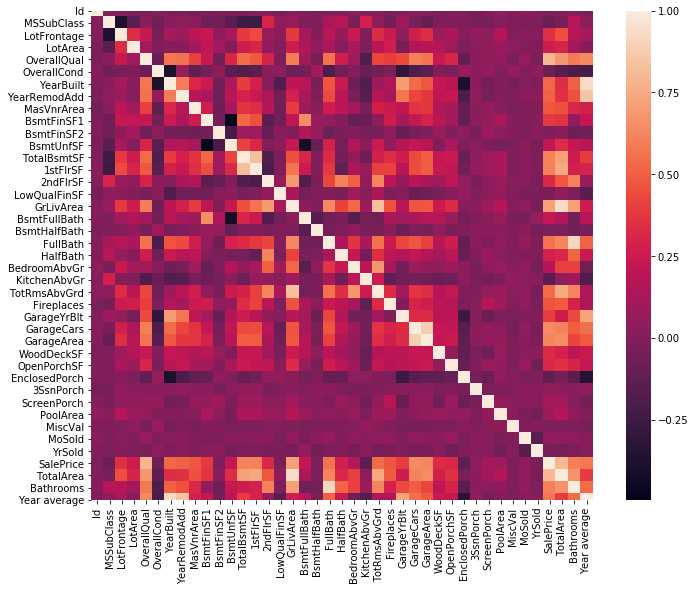

In [22]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), square=True)

From the above Heat map we can say:
* Garage Year built and Year Built of the house are highly correlated.
* Total Rooms Above Grade and Above Grade living area are highly correlated.
* Garage Area and Garage Cars are highly correlated.
* Sale Price and Overall Quality are highly correlated.
* Sale Price and Grade living area are highly correlated.
* Garage Year built and Enclosed Porch are negatively correlated
* Garage Year built and Overall Condition are negatively correlated
* Year Built and Enclosed Porch are negatively correlated

## Data Preparation

In [23]:
#Extracting Numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])


We could have plotted the pair plot here but for 38 attributes, it will be a computational heavy deal. So we will select some of the attributes and see the pattern with Sales (target variable)

In [24]:
#sns.pairplot(df_num)

In [25]:
df_num.columns
df_num =df_num.drop('Id', axis=1)

Finding outliers using scatter plot

Text(0, 0.5, 'Sale Price')

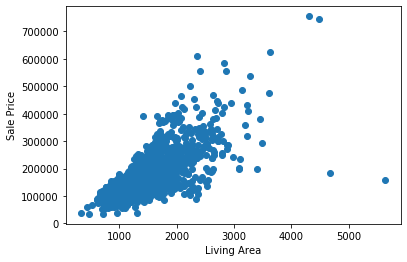

In [26]:
# Since we are focused on finding the SalePrice, we will try to find the pattern with other attributes.
plt.scatter(df.GrLivArea,df.SalePrice)
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

Here, we can see the points in right hand side are not following the trend. Like for more `Living Area` the `Sale Price` is low. We can see there are some outliers here.

Text(0, 0.5, 'Sale Price')

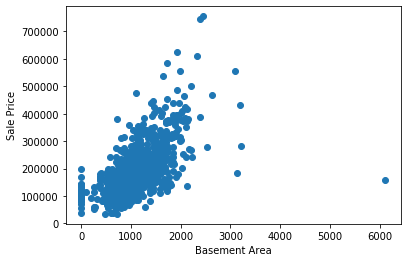

In [27]:
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.xlabel('Basement Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

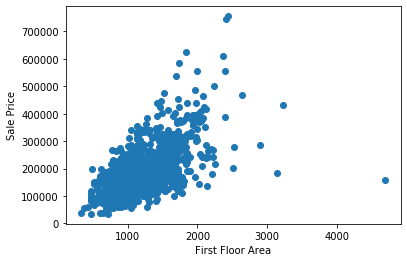

In [28]:
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.xlabel('First Floor Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

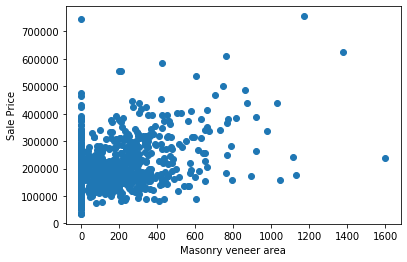

In [29]:
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.xlabel('Masonry veneer area')
plt.ylabel('Sale Price')

Let's see some outliers using Box Plot.

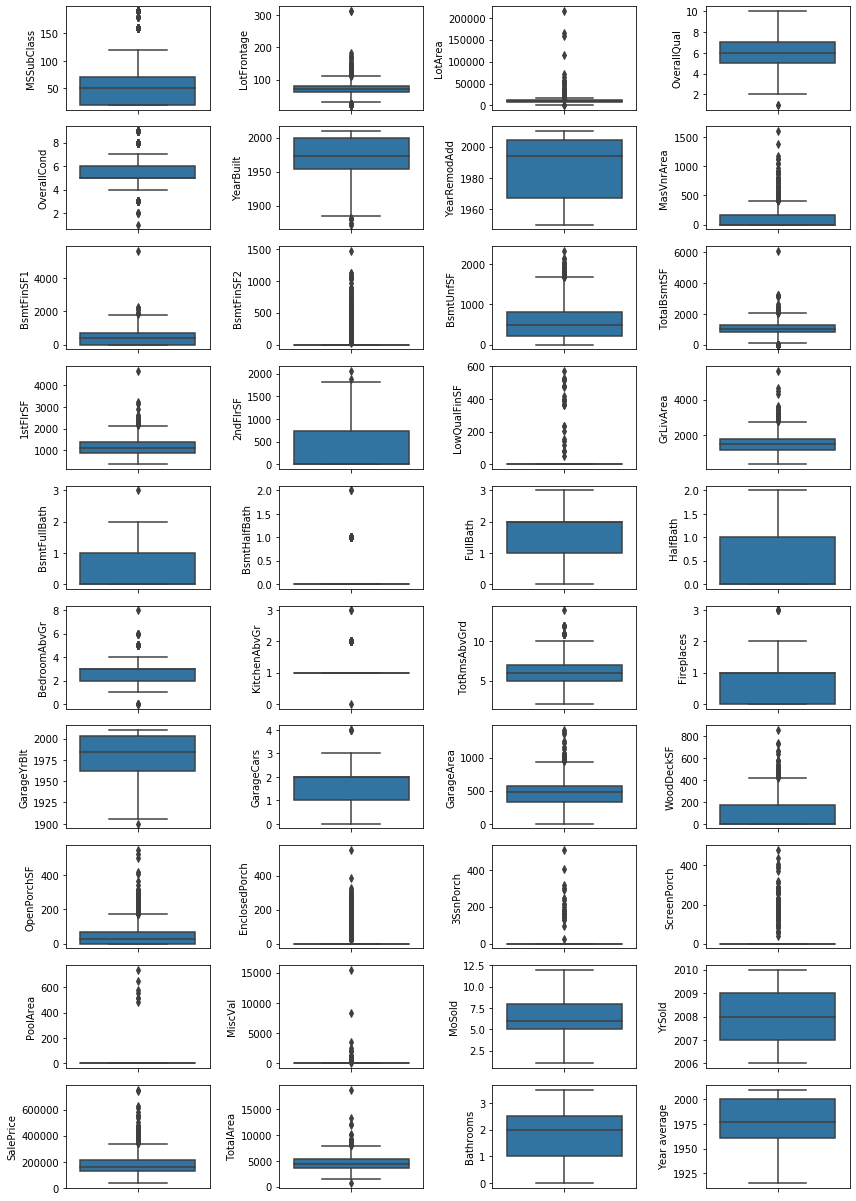

In [30]:
plt.figure(figsize=(12,50))
i=0
for col in df_num.columns:
    i = i+1
    plt.subplot(30,4,i)
    sns.boxplot(y=col,data=df)
    #plt.show()
plt.tight_layout()

Let's treat the outliers.

In [31]:
#We are using z score approach to removing the outliers.
from scipy import stats
df_outliers_treated = df.copy()
df_outliers_treated=df_outliers_treated[(np.abs(stats.zscore(df_outliers_treated[df_num.columns])) < 3.5).all(axis=1)]
df_outliers_treated.dropna(axis=0,inplace=True)
df_outliers_treated.shape

(1108, 84)

For z score = 3 it was dropping nearly 500 rows and the outliers are less. So we have increased the z score value to 3.5

In [32]:
df = df_outliers_treated

#### Scatter plots after the outlier treatement

Text(0, 0.5, 'Sale Price')

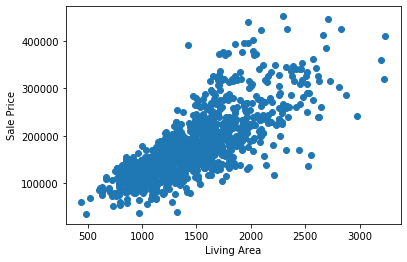

In [33]:
# Since we are focused on finding the SalePrice, we will try to find the pattern with other attributes.
plt.scatter(df.GrLivArea,df.SalePrice)
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

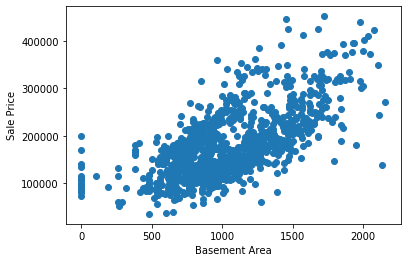

In [34]:
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.xlabel('Basement Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

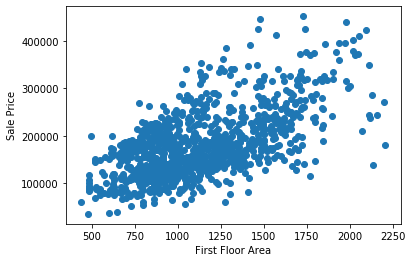

In [35]:
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.xlabel('First Floor Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

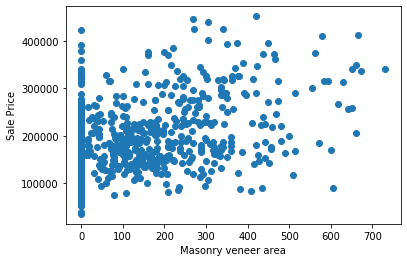

In [36]:
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.xlabel('Masonry veneer area')
plt.ylabel('Sale Price')

We can see there are no outliers anymore. And for the number of rows removed is shown below

In [37]:
print('We removed ',main_df.shape[0]- df.shape[0],'outliers')

We removed  352 outliers


In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Bathrooms,Year average
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,4824,2.5,2003.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,5100,2.5,2001.5
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,6377,2.5,2000.0
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000,5710,2.0,2004.5
7,8,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000,5771,2.5,1973.0


In [39]:
df_non_num = df.select_dtypes(include = 'object')

In [40]:
df_non_num.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
6,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
7,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,Shed,WD,Normal


In [41]:
col_data = []  #Makking array to store the column names with unique values and counts
for col in df_non_num.columns:
    col_data.append([col,df_non_num[col].unique(),df_non_num[col].nunique()])

In [42]:
df_non_num_col_data = pd.DataFrame(col_data, columns=['ColName','UniqueValues','UniqueCounts'])

In [43]:
df_non_num_col_data.sort_values(by='UniqueCounts')

,ColName,UniqueValues,UniqueCounts
38,PoolQC,[None],1
5,Utilities,[AllPub],1
28,CentralAir,"[Y, N]",2
1,Street,"[Pave, Grvl]",2
40,MiscFeature,"[None, Shed]",2
37,PavedDrive,"[Y, N, P]",3
7,LandSlope,"[Gtl, Mod, Sev]",3
10,Condition2,"[Norm, RRNn, Feedr]",3
2,Alley,"[None, Grvl, Pave]",3
17,MasVnrType,"[BrkFace, Stone, None, BrkCmn]",4


Please note that `PoolQC` and `Utilities` have only one unique value. So we can say there are no variation for these columns and we can remove them.

In [44]:
df.drop(['PoolQC','Utilities'], axis = 1, inplace = True)

Let's create dummy variable for each non numerical variable. 

In [45]:
df_dummies = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [46]:
df_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea,Bathrooms,Year average,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,4824,2.5,2003.0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0

In [47]:
df_dummies.drop('Id', inplace=True,axis = 1)
df_dummies.shape

(1108, 238)

There are 238 columns after creating dummies.

### Checking for Skew in the target (Sale Price)

(array([ 22., 173., 351., 253., 145.,  78.,  45.,  19.,  15.,   7.]),
 array([ 35311. ,  76974.9, 118638.8, 160302.7, 201966.6, 243630.5,
        285294.4, 326958.3, 368622.2, 410286.1, 451950. ]),
 <a list of 10 Patch objects>)

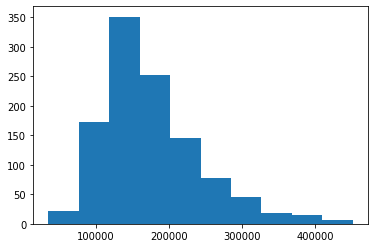

In [48]:
plt.hist(df_dummies.SalePrice)  

We can see the histogram is slighly shifted to the left hand side. And this need to be fixed.

(array([  3.,   4.,  13.,  63., 167., 306., 276., 168.,  83.,  25.]),
 array([10.47194981, 10.72688751, 10.98182521, 11.23676292, 11.49170062,
        11.74663832, 12.00157602, 12.25651373, 12.51145143, 12.76638913,
        13.02132683]),
 <a list of 10 Patch objects>)

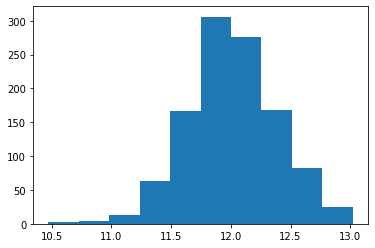

In [49]:
plt.hist(np.log(df_dummies.SalePrice))  #To rectify the the skewness.

In [50]:
y =np.log(df_dummies.pop('SalePrice')) #It can be considered as the target variable

### Scaling using Robust Scaler
Since we have seen there are Skew in the data and the outliers as well.
Robust Scaler is a better choice for this scenario

In [51]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
cols = df_dummies.columns
X = pd.DataFrame(scaler.fit_transform(df_dummies))
X.columns = cols
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,Bathrooms,Year average,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.25,-0.25,-0.177033,0.5,0.0,0.541667,0.222222,1.281046,0.443343,0.0,-0.601504,-0.248231,-0.429185,1.207494,0.0,0.484305,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.347826,0.0,0.301698,0.000000,0.507692,0.0,0.0,0.0,0.0,0.0,-1.230769,0.0,0.337549,0.333333,0.548780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### Splitting data in Test and Train set

In [52]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Evaluation
Here we use `Ridge` and `Lasso` regression

In [53]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
params= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}#{'alpha':[x for x in range(1,101)]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print("The best value of Alpha is: ",model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of Alpha is:  {'alpha': 7.0}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


### Now, let's see accuracy for different values of alphas

In [54]:
alphas = [0.0001,0.001,1,5,10]
for alp in alphas:
    ridge_mod = Ridge(alpha=alp)
    ridge_mod.fit(X_train, y_train)
    #ridge_mod_test = Ridge(X_test,y_test)
    print("Accuracy score for train set for alpha ", alp," is ",ridge_mod.score(X_train, y_train), " and Accuracy score for test is ",ridge_mod.score(X_test, y_test))

Accuracy score for train set for alpha  0.0001  is  0.9644454271781393  and Accuracy score for test is  0.8784057332127343
Accuracy score for train set for alpha  0.001  is  0.9644453171400938  and Accuracy score for test is  0.8785324306421591
Accuracy score for train set for alpha  1  is  0.9597547271789293  and Accuracy score for test is  0.8985552562080465
Accuracy score for train set for alpha  5  is  0.953377704792631  and Accuracy score for test is  0.9029261563404225
Accuracy score for train set for alpha  10  is  0.9495055937439535  and Accuracy score for test is  0.90367691784381


We can see the scores are pretty good for alpha = 10. (But for 7 we may get better result )

For alpha = 0.0001, 0.001 and 1 the test accuracy score is bad and train score is very good. Which is a sign of over fitting of the data.

### Plot showing the variation of test and train score with various alpha values

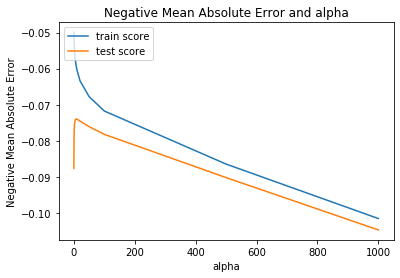

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head()
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### We can the Root mean square error values below:

In [56]:
import sklearn.metrics as sklm
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)
import math
print('Root Mean Square Error train = ' + str(round(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)),2)))
print('Root Mean Square Error test = ' + str(round(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)),2)))

Root Mean Square Error train = 0.09
Root Mean Square Error test = 0.12


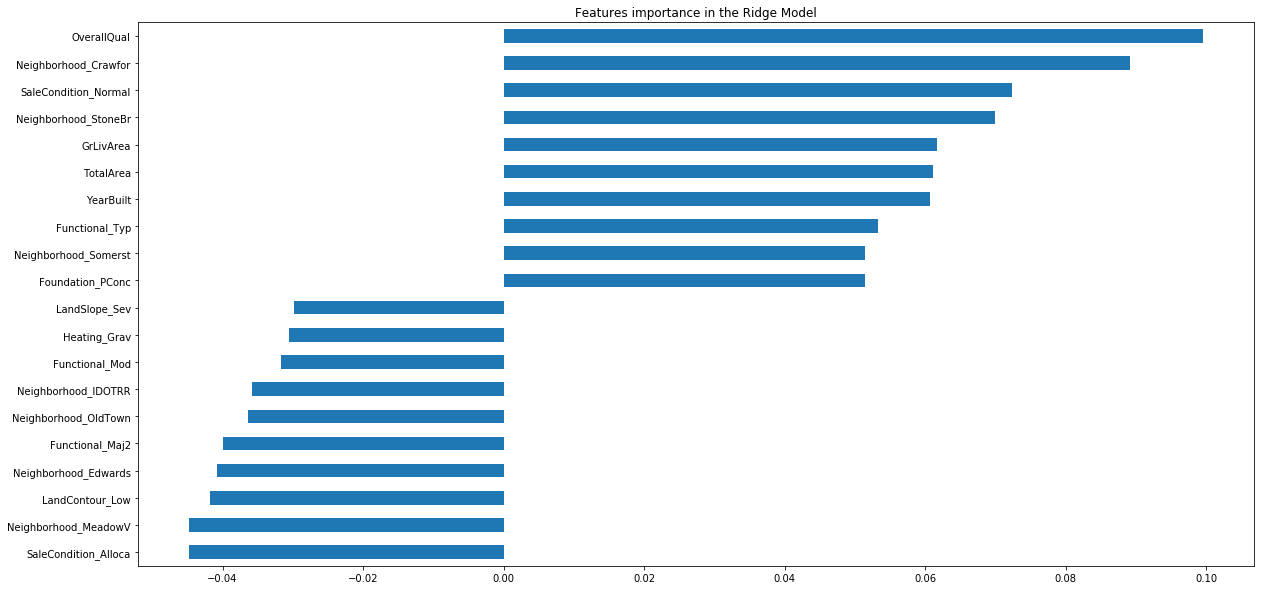

In [57]:
plt.figure(figsize=(20, 10))
coefs = pd.Series(ridge_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Ridge Model")
plt.show()

Please note that Ridge Regularisation is not used to select the columns but we have picked the top 10 and bottom 10 columns from the Ridge coeficient.

So following are some inferences from the the plot:
* Overall quality of the house is an important factor for the Sale Price
* Living Area is accountable for the high Sale Price
* If the Neighbourhood is Crawford, the price is expected to be more
* If the Neighbourhood is Edwards, the prices will get very low.
* If the Pool quality is good also, the prices are expected to get low. 

## Lasso Regularisation

In [58]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) ;

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9340527505686816, tolerance: 0.009158842847292117
  positive)
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2661684372515964, tolerance: 0.009091867671892875
  positive)
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0504614977058504, tolerance: 0.009046741985839444
  positive)
C:\Users\chand\AppData\Local\Continuum\a

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071007,0.005601,0.001598,0.000797,0.0001,{'alpha': 0.0001},-0.077658,-0.080866,-0.065019,-0.082510,-0.077056,-0.076622,0.006141,2,-0.052736,-0.051765,-0.055552,-0.050837,-0.053428,-0.052864,0.001605
1,0.048971,0.010731,0.000798,0.000399,0.001,{'alpha': 0.001},-0.077720,-0.070751,-0.069495,-0.084235,-0.070320,-0.074504,0.005687,1,-0.064216,-0.065823,-0.067899,-0.063958,-0.066978,-0.065775,0.001529
2,0.008377,0.000489,0.000200,0.000399,0.01,{'alpha': 0.01},-0.087695,-0.078886,-0.078976,-0.100341,-0.081547,-0.085489,0.008087,3,-0.082856,-0.083281,-0.084483,-0.080392,-0.084041,-0.083011,0.001427
3,0.004986,0.001092,0.000798,0.000399,0.05,{'alpha': 0.05},-0.122829,-0.121637,-0.109362,-0.133049,-0.116212,-0.120618,0.007830,4,-0.117939,-0.118189,-0.119840,-0.116292,-0.118735,-0.118199,0.001156
4,0.006284,0.000399,0.001396,0.000488,0.1,{'alpha': 0.1},-0.161621,-0.158079,-0.151669,-0.179864,-0.158749,-0.161996,0.009507,5,-0.159933,-0.159638,-0.160923,-0.159266,-0.162437,-0.160439,0.001140


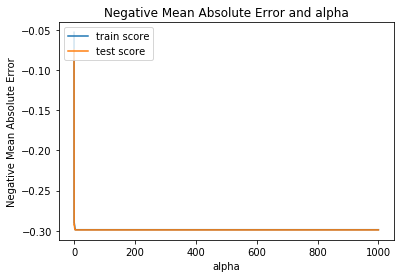

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

It is quite dificult to see the alpha value in the plot. But from we can find the alpha value

In [61]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X,y)
print('The best value of Alpha is: ',lasso_reg.best_params_)

C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9671353732909747, tolerance: 0.012869396907174993
  positive)
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.004820525677504, tolerance: 0.012458734199035306
  positive)
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9567901059192914, tolerance: 0.012707109730619413
  positive)
C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: Converg

The best value of Alpha is:  {'alpha': 0.001}


Fitting the Lasso model with alpha = 0.001

In [62]:
alpha =0.001

lasso_mod = Lasso(alpha=alpha)
        
lasso_mod.fit(X_train, y_train) 

C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07516372990875198, tolerance: 0.011215022462412702
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Below are coeficients generated by the lasso model.

In [63]:
lasso_mod.coef_

array([-5.33376456e-03,  1.04350857e-02,  1.78614267e-02,  1.24008584e-01,
        4.51513340e-02,  1.06205415e-01,  0.00000000e+00,  1.25822006e-03,
        4.33951895e-02,  5.20740634e-05, -0.00000000e+00,  5.89773153e-03,
        0.00000000e+00,  0.00000000e+00, -1.64460619e-04,  1.78864380e-02,
        2.00467404e-02,  0.00000000e+00,  1.94326266e-02,  9.21567488e-03,
       -0.00000000e+00,  0.00000000e+00,  7.07662080e-03,  0.00000000e+00,
       -3.63609104e-03,  2.16318267e-02, -0.00000000e+00,  1.58347419e-02,
        8.19052642e-03,  1.05463340e-04, -4.96281066e-04,  2.32061998e-04,
        0.00000000e+00,  2.92225573e-05,  1.05987488e-03, -2.30793295e-03,
        1.89524259e-01,  0.00000000e+00,  1.49663740e-02,  1.22977648e-02,
        0.00000000e+00,  5.04896414e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.02187202e-02, -1.15960332e-02,  7.65590440e-03,
        7.07582937e-03, -

Let's visualize it for our better understanding.

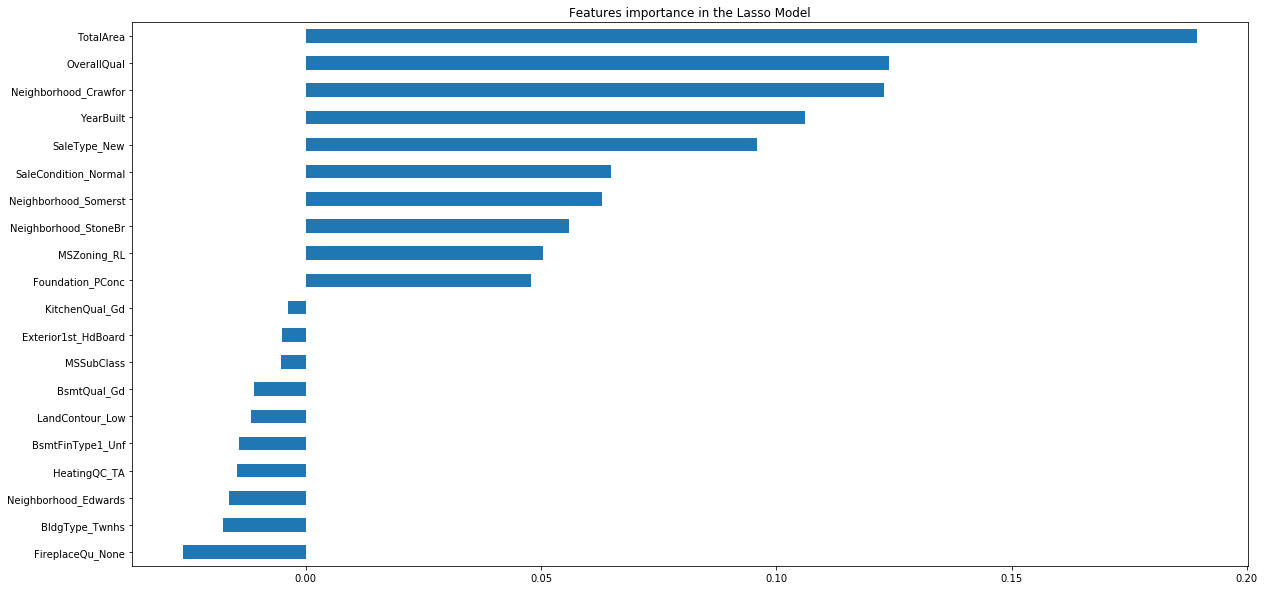

In [64]:
plt.figure(figsize=(20, 10))
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Lasso Model")
plt.show()

In [65]:
print("Lasso Model selected",sum(coefs != 0), "important features and dropped the other", sum(coefs == 0)," features")

Lasso Model selected 70 important features and dropped the other 167  features


As we know the Lasso Model selection is used for selecting features as well. 

### We can the Root mean square error values below:

In [66]:
y_pred_train=lasso_mod.predict(X_train)
y_pred_test=lasso_mod.predict(X_test)
import math
print('Root Mean Square Error train = ' + str(round(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)),2)))
print('Root Mean Square Error test = ' + str(round(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)),2)))

Root Mean Square Error train = 0.09
Root Mean Square Error test = 0.12


So the RMSE is same as for Ridge as well.

## Understanding from the analysis
* The property with high Total Area will cost more and hence the profit margin can be better.
* If the Overall Quality is good the price of the property will be more.
* Property with Neighbourhood Crawfor, adds up the Sale Price.
* For Sale Type New, the price is expected to be more.
* Property with good condition will be sold for more price.
* The absence of the Fireplace has shown the decline of the price of the property. `Surprise` can invest in Fireplace and increase the price of the property.
* `Surprise` should be stay away from Townhouse building type.
* It should also avoid the property with neighbourhood Edwards.
* `Surprise` can invest some in heating system and enhance the quality and then the property can be sold in a better price.